In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [ ]:
data= pd.read_excel("E:\Internship Pritish\ml project\HomeB-electrical\HomeB\HomeB-combined.xlsx")

In [ ]:
data_2016=pd.read_csv("E:\Internship Pritish\ml project\HomeB-electrical\HomeB\HomeB-meter1_2016.csv",parse_dates=['Date & Time'])
df_2016=pd.read_csv("E:\Internship Pritish\ml project\HomeB-electrical\HomeB\HomeB-meter1_2016.csv",parse_dates=['Date & Time'])

In [ ]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(data['Date & Time'])
train_dataset['y']=data['Total']
train_dataset.head(2)

,ds,y
0,2014-01-01 00:00:00,0.510009
1,2014-01-01 00:30:00,0.921256


In [ ]:
model=Prophet(yearly_seasonality=True)
model.fit(train_dataset)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [ ]:
#future = pd.DataFrame({'ds': pd.date_range(start='2016-01-01 00:00:00', periods=10, freq='d')})

In [ ]:
future= model.make_future_dataframe(periods=16798,freq='30min')

In [ ]:
future.tail(10)

,ds
51828,2016-12-15 18:00:00
51829,2016-12-15 18:30:00
51830,2016-12-15 19:00:00
51831,2016-12-15 19:30:00
51832,2016-12-15 20:00:00
51833,2016-12-15 20:30:00
51834,2016-12-15 21:00:00
51835,2016-12-15 21:30:00
51836,2016-12-15 22:00:00
51837,2016-12-15 22:30:00


In [ ]:
forecast=model.predict(future)

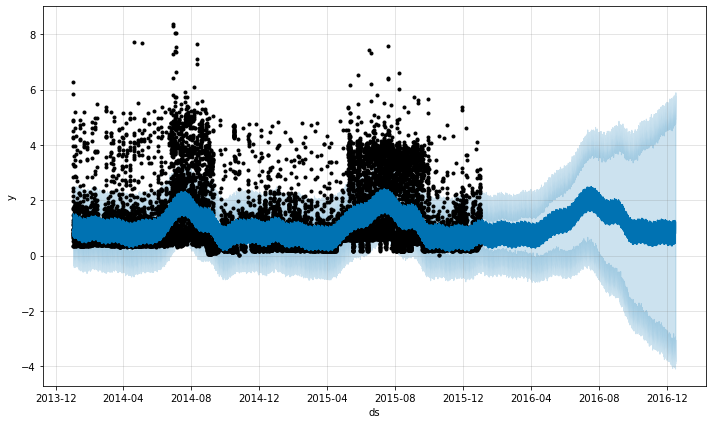

In [ ]:
fig1 =model.plot(forecast)

In [ ]:
pred=forecast[35040:]

In [ ]:
forecast[:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:00:00,1.191805,-0.030782,1.943412,1.191805,1.191805,-0.261595,-0.261595,-0.261595,-0.113891,...,0.009830,0.009830,0.009830,-0.157534,-0.157534,-0.157534,0.0,0.0,0.0,0.930210
1,2014-01-01 00:30:00,1.191787,-0.115768,1.849652,1.191787,1.191787,-0.296385,-0.296385,-0.296385,-0.149737,...,0.010904,0.010904,0.010904,-0.157552,-0.157552,-0.157552,0.0,0.0,0.0,0.895402
2,2014-01-01 01:00:00,1.191770,-0.081819,1.828186,1.191770,1.191770,-0.330197,-0.330197,-0.330197,-0.184595,...,0.011970,0.011970,0.011970,-0.157572,-0.157572,-0.157572,0.0,0.0,0.0,0.861572
3,2014-01-01 01:30:00,1.191752,-0.223219,1.803694,1.191752,1.191752,-0.365976,-0.365976,-0.365976,-0.221406,...,0.013022,0.013022,0.013022,-0.157592,-0.157592,-0.157592,0.0,0.0,0.0,0.825776
4,2014-01-01 02:00:00,1.191735,-0.173181,1.726249,1.191735,1.191735,-0.403947,-0.403947,-0.403947,-0.260393,...,0.014060,0.014060,0.014060,-0.157613,-0.157613,-0.157613,0.0,0.0,0.0,0.787787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51833,2016-12-15 20:30:00,1.138882,-3.143244,5.641468,-3.150609,5.489030,-0.004341,-0.004341,-0.004341,0.360121,...,-0.030885,-0.030885,-0.030885,-0.333577,-0.333577,-0.333577,0.0,0.0,0.0,1.134540
51834,2016-12-15 21:00:00,1.138892,-3.191299,5.607271,-3.151143,5.489419,-0.079072,-0.079072,-0.079072,0.285839,...,-0.031607,-0.031607,-0.031607,-0.333304,-0.333304,-0.333304,0.0,0.0,0.0,1.059820
51835,2016-12-15 21:30:00,1.138902,-3.204067,5.495609,-3.151676,5.489808,-0.163098,-0.163098,-0.163098,0.202229,...,-0.032297,-0.032297,-0.032297,-0.333030,-0.333030,-0.333030,0.0,0.0,0.0,0.975805
51836,2016-12-15 22:00:00,1.138913,-3.461504,5.436186,-3.152209,5.490197,-0.247027,-0.247027,-0.247027,0.118682,...,-0.032954,-0.032954,-0.032954,-0.332755,-0.332755,-0.332755,0.0,0.0,0.0,0.891886


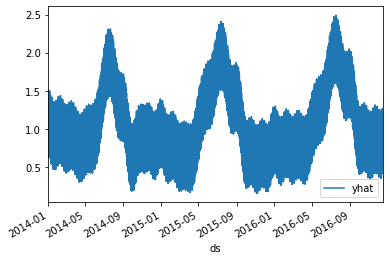

In [ ]:
forecast.plot(x='ds',y='yhat',kind='line')

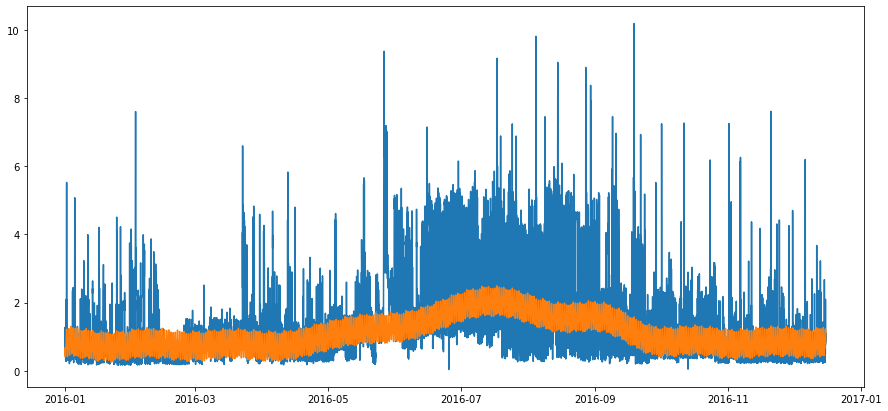

In [ ]:
fig = plt.figure(figsize=(15,7))
plt.plot(data_2016['Date & Time'],data_2016['Total'])
plt.plot(pred['ds'],pred['yhat'])

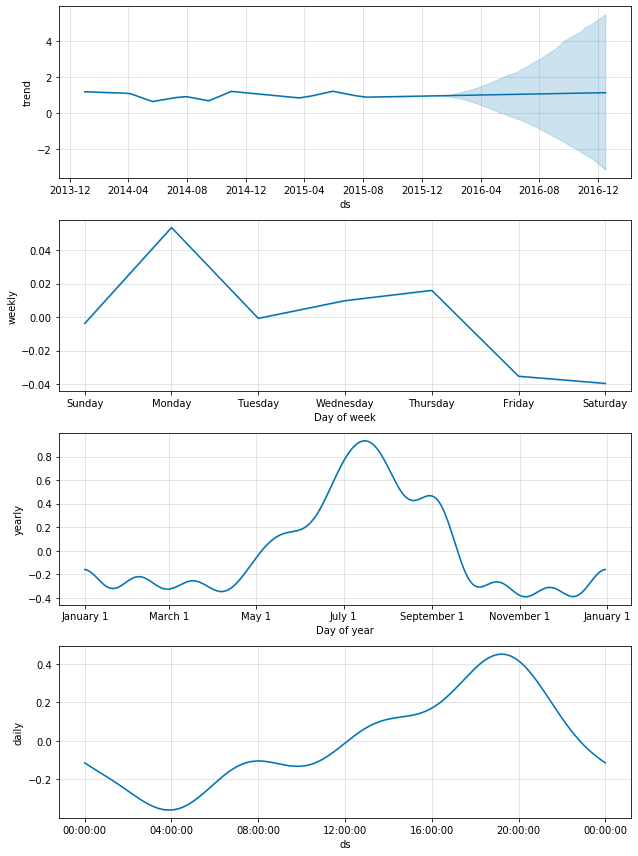

In [ ]:
fig1 = model.plot_components(forecast)

In [ ]:
diff=pd.DataFrame(columns=['Datetime','Diff'])
#diff['Datetime']=pred['ds']

In [ ]:
for i in range(len(pred)-1):
    diff=diff.append({'Datetime':pred['ds'].iloc[i],'Diff':pred['yhat'].iloc[i]-data_2016['Total'].iloc[i]},ignore_index=True)
   

In [ ]:
pred['ds']

35040   2016-01-01 00:00:00
35041   2016-01-01 00:30:00
35042   2016-01-01 01:00:00
35043   2016-01-01 01:30:00
35044   2016-01-01 02:00:00
                ...        
51833   2016-12-15 20:30:00
51834   2016-12-15 21:00:00
51835   2016-12-15 21:30:00
51836   2016-12-15 22:00:00
51837   2016-12-15 22:30:00
Name: ds, Length: 16798, dtype: datetime64[ns]

In [ ]:
diff.head()

,Datetime,Diff
0,2016-01-01 00:00:00,0.053714
1,2016-01-01 00:30:00,0.134816
2,2016-01-01 01:00:00,-0.270814
3,2016-01-01 01:30:00,-0.324093
4,2016-01-01 02:00:00,0.005286


In [ ]:
df_2016=pd.read_csv("E:\Internship Pritish\ml project\HomeB-electrical\HomeB\HomeB-meter1_2016.csv",parse_dates=['Date & Time'])
df_2016.head(3)

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],...,Tub Whirpool [kW],Kitchen counter [kW],Dishwasher [kW],Fridge [kW],Guest Bedroom / Media Room [kW],MBed KBed Lights &amp,MasterBath [kW],Living room &amp,"Bath GFI (1st &amp,2nd floor bath) [kW]",Total
0,2016-01-01 00:00:00,0.455814,0,0.455814,0.001166,0.189853,0.006457,0.003416,0.032004,0.002309,...,0.000483,0.005433,0.001333,0.072033,0.005883,0.004850,0.041550,0.002367,0,0.605095
1,2016-01-01 00:30:00,0.403376,0,0.403376,0.000659,0.104036,0.006415,0.003429,0.031977,0.002378,...,0.000617,0.005433,0.001200,0.003567,0.006133,0.004817,0.041417,0.002450,0,0.487662
2,2016-01-01 01:00:00,0.662962,0,0.662962,0.000823,0.107150,0.006254,0.003527,0.119877,0.002413,...,0.000383,0.005583,0.001483,0.124233,0.006067,0.004633,0.041183,0.002317,0,0.857979


In [ ]:
temp=df_2016
temp.drop(columns=['use [kW]','Grid [kW]','gen [kW]'])

,Date & Time,AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],...,Tub Whirpool [kW],Kitchen counter [kW],Dishwasher [kW],Fridge [kW],Guest Bedroom / Media Room [kW],MBed KBed Lights &amp,MasterBath [kW],Living room &amp,"Bath GFI (1st &amp,2nd floor bath) [kW]",Total
0,2016-01-01 00:00:00,0.001166,0.189853,0.006457,0.003416,0.032004,0.002309,0.004976,0.090664,0.000021,...,0.000483,0.005433,0.001333,0.072033,0.005883,0.004850,0.041550,0.002367,0,0.605095
1,2016-01-01 00:30:00,0.000659,0.104036,0.006415,0.003429,0.031977,0.002378,0.004958,0.090591,0.000068,...,0.000617,0.005433,0.001200,0.003567,0.006133,0.004817,0.041417,0.002450,0,0.487662
2,2016-01-01 01:00:00,0.000823,0.107150,0.006254,0.003527,0.119877,0.002413,0.012929,0.090467,0.000173,...,0.000383,0.005583,0.001483,0.124233,0.006067,0.004633,0.041183,0.002317,0,0.857979
3,2016-01-01 01:30:00,0.001426,0.196811,0.006257,0.003562,0.132939,0.002367,0.004988,0.090688,0.000123,...,0.000383,0.005450,0.001433,0.118000,0.005750,0.004683,0.073933,0.002333,0,0.874019
4,2016-01-01 02:00:00,0.000759,0.119401,0.006401,0.003441,0.054034,0.002423,0.005025,0.077748,0.000040,...,0.000600,0.005333,0.001200,0.003600,0.006000,0.004850,0.074267,0.002433,0,0.505253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,2016-12-15 20:00:00,0.002650,0.440733,0.006100,0.003233,0.052400,0.002900,0.004683,0.073767,0.000067,...,0.000717,0.005317,0.001200,0.003050,0.005617,0.018533,0.031600,0.002400,0,0.848267
16793,2016-12-15 20:30:00,0.002650,0.451467,0.006133,0.003233,0.053050,0.002900,0.004717,0.073333,0.000033,...,0.000483,0.005567,0.001417,0.123883,0.005550,0.018333,0.031167,0.002317,0,1.102117
16794,2016-12-15 21:00:00,0.002633,0.438933,0.006050,0.003267,0.053083,0.002983,0.004833,0.073050,0.000033,...,0.000700,0.005417,0.001200,0.003067,0.006233,0.018467,0.031217,0.002433,0,0.848333
16795,2016-12-15 21:30:00,0.002700,0.450850,0.006100,0.003283,0.053150,0.002967,0.004833,0.073400,0.000067,...,0.000700,0.005450,0.001217,0.003083,0.005767,0.018867,0.031300,0.002433,0,0.860583


In [ ]:
for i in range(len(diff)):
    if(diff['Diff'].iloc[i]<0):
        temp[temp['Date & Time'] == diff['Datetime'].iloc[i]]

In [ ]:
temp.loc[temp['Date & Time'] == diff['Datetime'].iloc[1]]

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],...,Tub Whirpool [kW],Kitchen counter [kW],Dishwasher [kW],Fridge [kW],Guest Bedroom / Media Room [kW],MBed KBed Lights &amp,MasterBath [kW],Living room &amp,"Bath GFI (1st &amp,2nd floor bath) [kW]",Total
1,2016-01-01 00:30:00,0.403376,0,0.403376,0.000659,0.104036,0.006415,0.003429,0.031977,0.002378,...,0.000617,0.005433,0.0012,0.003567,0.006133,0.004817,0.041417,0.00245,0,0.487662
